## Import các thư viện cần thiết

In [ ]:
import pandas as pd
from pyvi import ViTokenizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import underthesea
import string
import re
import nltk


import warnings
warnings.filterwarnings('ignore')
nltk.download('omw-1.4', quiet=True)
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (17,7)
plt.rcParams['font.size'] = 18

## Khai báo các hàm tiền xử lý dữ liệu văn bản

In [ ]:
# Tokenize các từ 
def VN_Tokenize(text: str, format='text'):
    return underthesea.word_tokenize(text)

# Chuyển các từ thành chữ thường
def text_lowercase(text: str):
    return text.lower()

# Loại bỏ các số 
def remove_number(text):
    result = re.sub(r'\d+', '', text)
    return result

# Tách các từ Tiếng Việt
def tach_tu_tieng_viet(text: str):
	text = ViTokenizer.tokenize(text)
	return text

# Loại bỏ các từ dừng Tiếng Việt
def remove_VN_stopwords(text: str):
    file_stopwords = pd.read_csv(r'data_analysis\vietnamese-stopwords.txt', encoding='UTF-8')
    file_stopwords.columns = ["Stop_words"]

    VN_stopword = []
    for i in file_stopwords["Stop_words"]:
        VN_stopword.append(i)

    text_token = VN_Tokenize(text)
    result = [word for word in text_token if word not in VN_stopword]
    return " ".join(result)

# Loại bỏ các dấu trong câu
def remove_punctuation(text):
    text = text.replace(",", " ").replace(".", " ") \
    .replace(";", " ").replace("“", " ") \
    .replace(":", " ").replace("”", " ") \
    .replace('"', " ").replace("'", " ") \
    .replace("!", " ").replace("?", " ") \
    .replace("(", " ").replace(")", " ") \
    .replace("-", " ").replace("?", " ") \
    .replace("/", " ")
    return text

# Hàm xử lý cuối cùng
def preprocess_text(text: str):
    text = text_lowercase(text)
    text = remove_number(text)
    text = remove_punctuation(text)
    text = tach_tu_tieng_viet(text)
    text = remove_VN_stopwords(text)
    return text

## Áp dụng hàm tiền xử lý

In [ ]:
coffee_faq_file = open(r"./coffee_faq.txt", "r", encoding="utf-8")
coffee_faq = coffee_faq_file.read()
coffee_faq_file.close()

# Tiền xử lý file coffee_faq
coffee_faq = preprocess_text(coffee_faq)

In [ ]:
sb_egift_file = open(r"./dieu_khoan_sb_egift.txt", "r", encoding="utf-8")
sb_egift = sb_egift_file.read()
sb_egift_file.close()

# Tiền xử lý file sb_egift
sb_egift = preprocess_text(sb_egift)

In [ ]:
sb_drinks_file = open(r"./sb_drinks_faq.txt", "r", encoding="utf-8")
sb_drinks = sb_drinks_file.read()
sb_drinks_file.close()

# Tiền xử lý file sb_drinks
sb_drinks = preprocess_text(sb_drinks)

In [ ]:
sb_reward_file = open(r"./sb_reward_faq.txt", "r", encoding="utf-8")
sb_reward = sb_reward_file.read()
sb_reward_file.close()

# Tiền xử lý file sb_reward
sb_reward = preprocess_text(sb_reward)

## Trực quan hóa file coffee_faq

#### Coffee_faq Word Counts Bar Plot

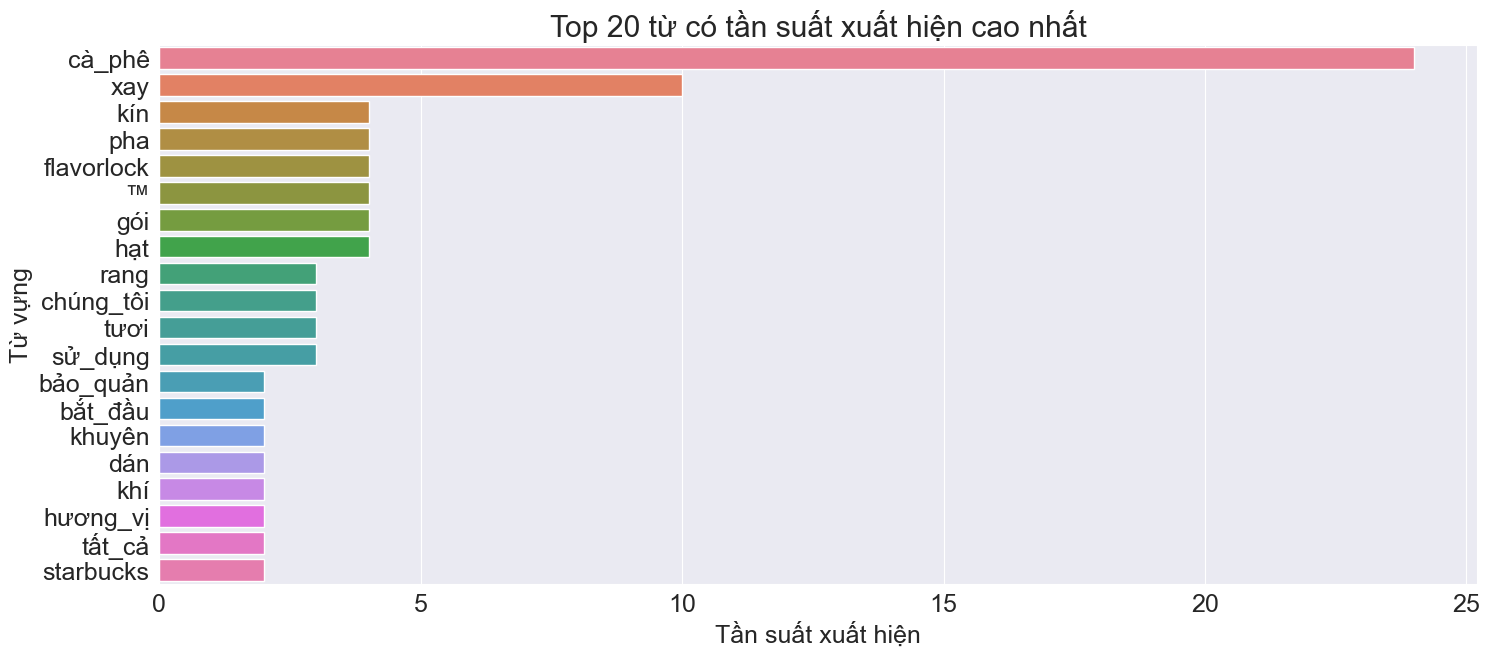

In [ ]:
from collections import Counter

split_it = coffee_faq.split()
coffee_faq_counter = Counter(split_it)
coffee_faq_counts = coffee_faq_counter.most_common(20)

df = pd.DataFrame(coffee_faq_counts, columns=['Từ vựng', 'Tần suất xuất hiện'])
sns.barplot(x='Tần suất xuất hiện', y='Từ vựng',
            data=df, orient="h",
            palette=("husl"))
plt.title("Top 20 từ có tần suất xuất hiện cao nhất")
plt.show()

#### Coffee_faq Word Cloud

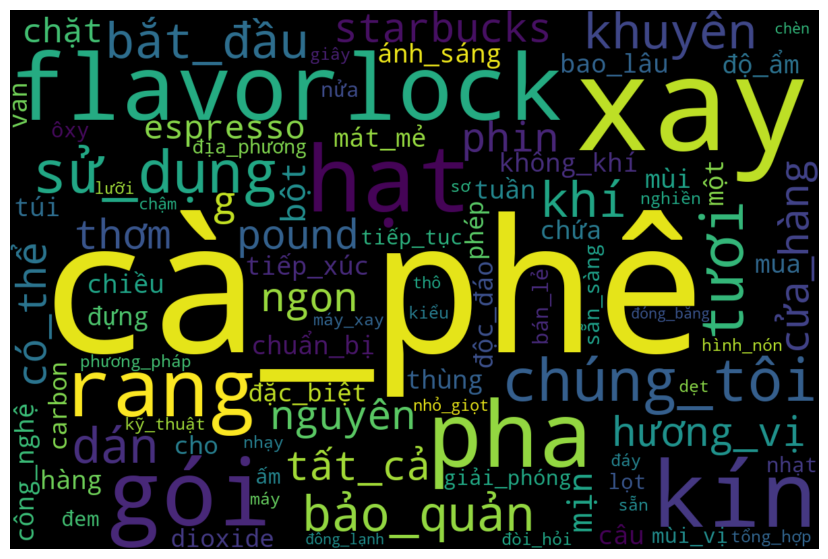

In [ ]:
wordcloud = WordCloud(width=1200, height=800).generate(coffee_faq)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Trực quan hóa file E_gift

#### E_gift Word Counts Bar Plot

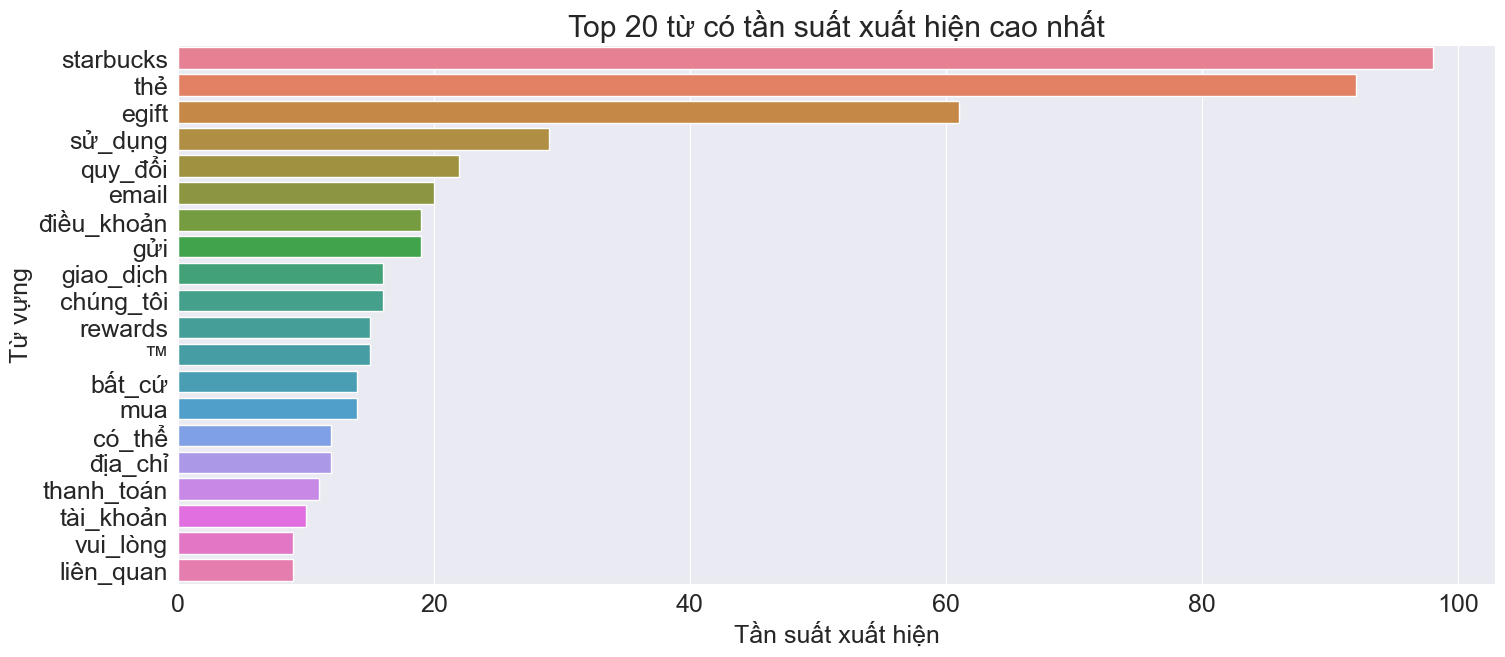

In [ ]:
from collections import Counter

split_it = sb_egift.split()
sb_egift_counter = Counter(split_it)
sb_egift_counts = sb_egift_counter.most_common(20)

df = pd.DataFrame(sb_egift_counts, columns=['Từ vựng', 'Tần suất xuất hiện'])
sns.barplot(x='Tần suất xuất hiện', y='Từ vựng',
            data=df, orient="h",
            palette=("husl"))
plt.title("Top 20 từ có tần suất xuất hiện cao nhất")
plt.show()

#### E_gift Word Cloud

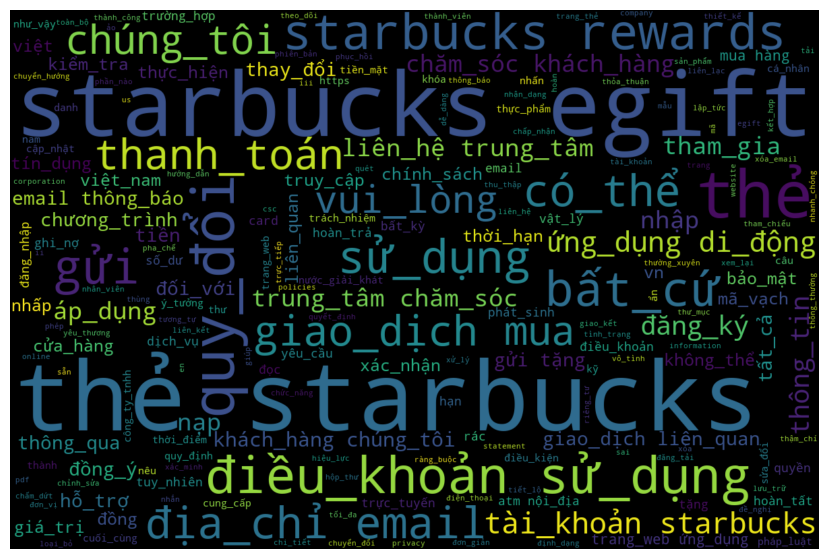

In [ ]:
wordcloud = WordCloud(width=1200, height=800).generate(sb_egift)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Trực quan hóa file SB_Drinks

#### SB_Drinks Word Counts Bar Plot

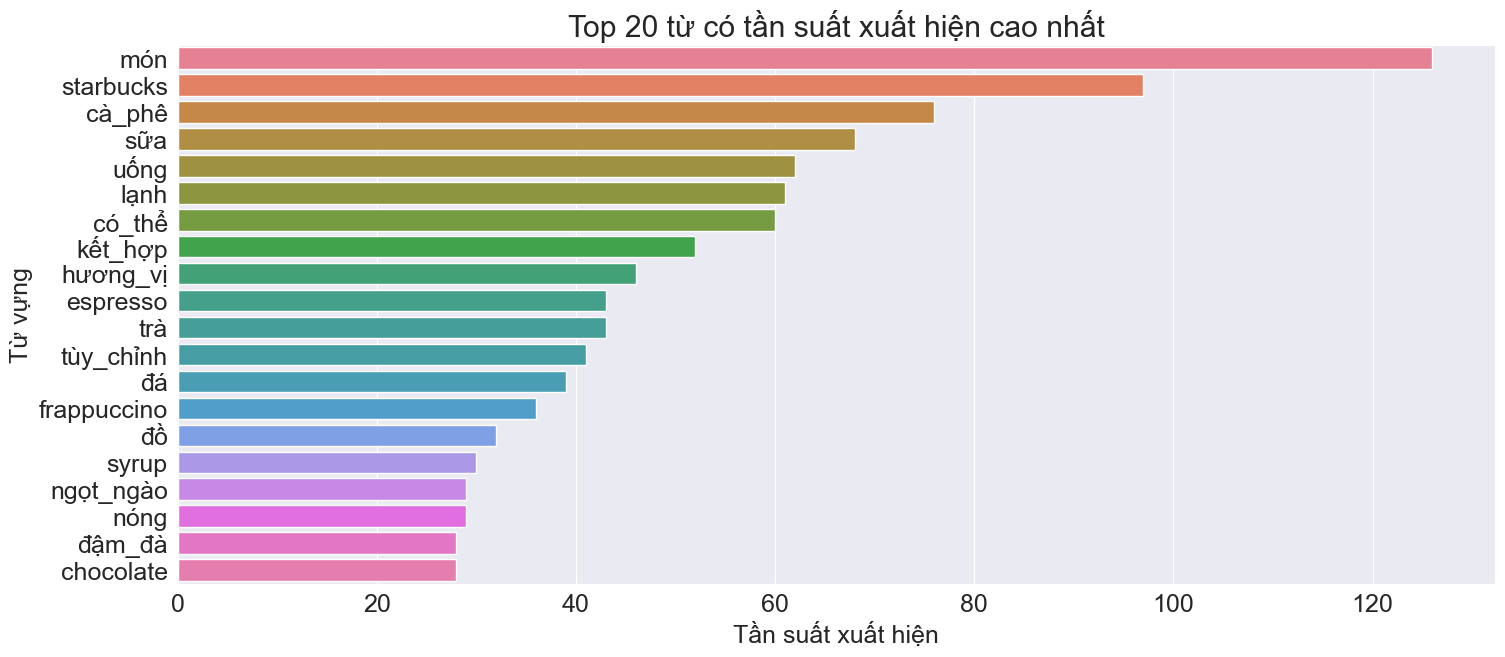

In [ ]:
from collections import Counter

split_it = sb_drinks.split()
sb_drinks_counter = Counter(split_it)
sb_drinks_counts = sb_drinks_counter.most_common(20)

df = pd.DataFrame(sb_drinks_counts, columns=['Từ vựng', 'Tần suất xuất hiện'])
sns.barplot(x='Tần suất xuất hiện', y='Từ vựng',
            data=df, orient="h",
            palette=("husl"))
plt.title("Top 20 từ có tần suất xuất hiện cao nhất")
plt.show()

#### SB_Drinks Word Cloud

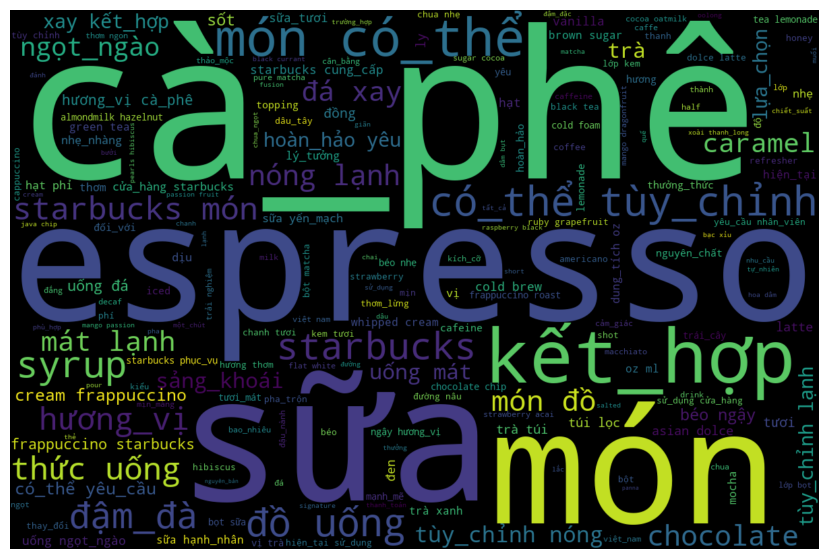

In [ ]:
wordcloud = WordCloud(width=1200, height=800).generate(sb_drinks)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Trực quan hóa file SB_Reward

#### SB_Reward Word Counts Bar Plot

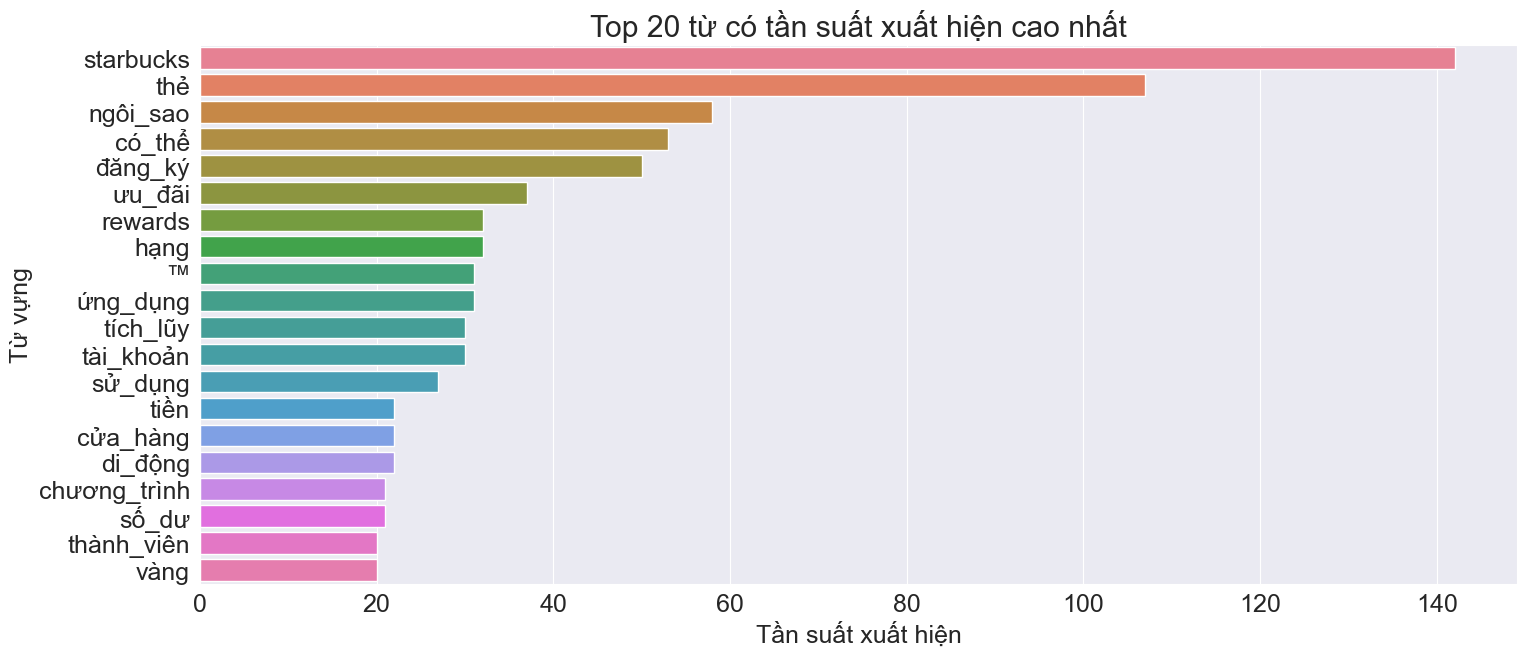

In [ ]:
from collections import Counter

split_it = sb_reward.split()
sb_reward_counter = Counter(split_it)
sb_reward_counts = sb_reward_counter.most_common(20)

df = pd.DataFrame(sb_reward_counts, columns=['Từ vựng', 'Tần suất xuất hiện'])
sns.barplot(x='Tần suất xuất hiện', y='Từ vựng',
            data=df, orient="h",
            palette=("husl"))
plt.title("Top 20 từ có tần suất xuất hiện cao nhất")
plt.show()

#### SB_Reward Word Cloud

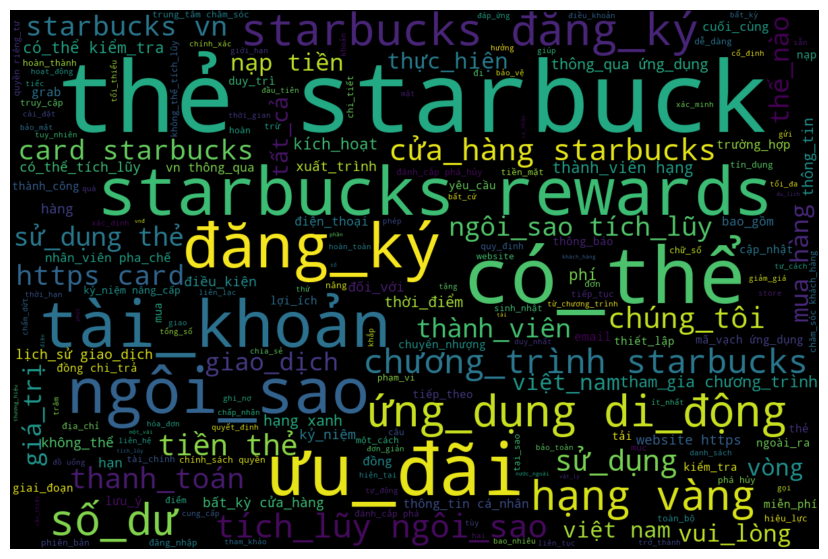

In [ ]:
wordcloud = WordCloud(width=1200, height=800).generate(sb_reward)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()